<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wquantiles

In [ ]:
!pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic-train.csv')

In [4]:
print(df.info())
print(df.describe())
print(df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

<ipython-input-5-0f5ec0304380>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-5-0f5ec0304380>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [6]:
total_records      = len(df)
survived_count     = df['Survived'].sum()
not_survived_count = total_records - survived_count
global_survival_rate = survived_count / total_records

print("Total registros:", total_records)
print("Sobrevivieron:", survived_count)
print("No sobrevivieron:", not_survived_count)
print(f"Tasa global de supervivencia: {global_survival_rate:.2%}")

Total registros: 891
Sobrevivieron: 342
No sobrevivieron: 549
Tasa global de supervivencia: 38.38%


En este primer resultado observamos que, de los 891 pasajeros que tenemos en el conjunto de datos, solo 342 sobrevivieron frente a 549 que no lo hicieron, lo que arroja una tasa global de supervivencia del 38,38 %.  Esta tasa global servirá de línea base para comparar subgrupos (por sexo, clase y edad) y ver en cuáles la probabilidad de sobrevivir fue mayor o menor.

In [7]:
sex_counts = df['Sex'].value_counts()
pclass_sex_counts = df.groupby(['Pclass','Sex']).size()

print("Pasajeros por sexo:\n", sex_counts)
print("\nDesglose por clase y sexo:\n", pclass_sex_counts)

Pasajeros por sexo:
 Sex
male      577
female    314
Name: count, dtype: int64

Desglose por clase y sexo:
 Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64


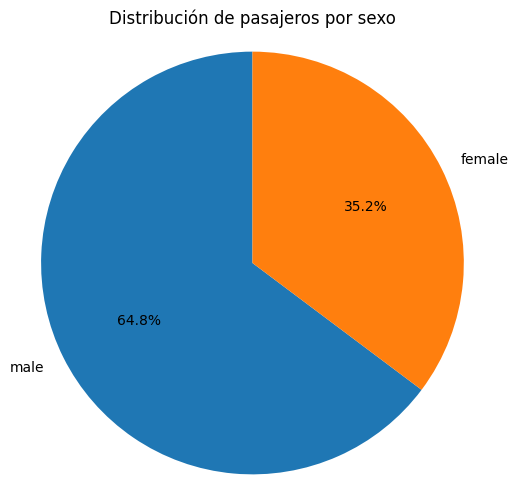

In [18]:
plt.figure(figsize=(6,6))
plt.pie(sex_counts,
    labels=sex_counts.index,
    autopct='%1.1f%%',
    startangle=90)
plt.title('Distribución de pasajeros por sexo')
plt.axis('equal')
plt.show()

<ipython-input-20-9c0d22b7b755>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sexo')


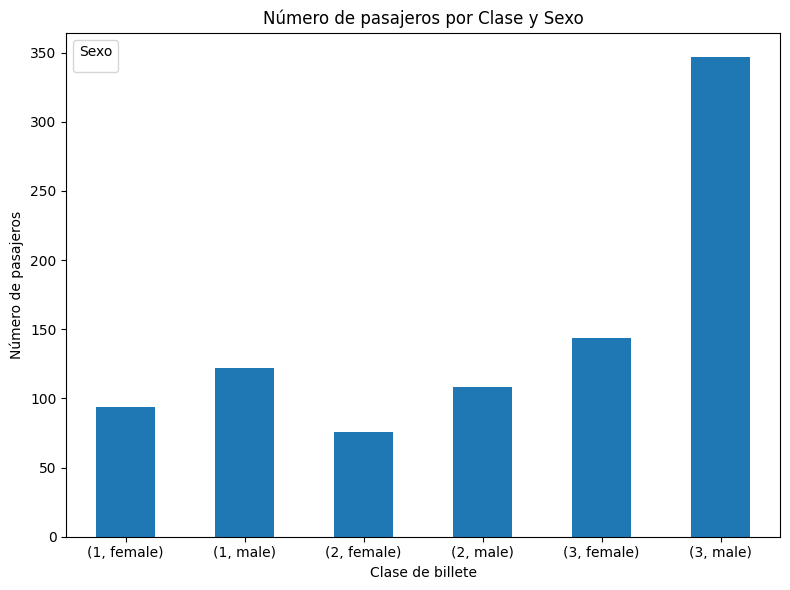

In [20]:
plt.figure(figsize=(8,6))
pclass_sex_counts.plot(kind='bar', figsize=(8,6))
plt.title('Número de pasajeros por Clase y Sexo')
plt.xlabel('Clase de billete')
plt.ylabel('Número de pasajeros')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

La clase 3 es la que concentra más pasajeros (491), sobre todo hombres (347 vs. 144 mujeres). A medida que baja la clase (de 1 a 3), la proporción de mujeres respecto al total de esa clase disminuye. En primera clase la distribución es más equilibrada (122 hombres vs. 94 mujeres), mientras que en tercera clase hay una clara mayoría masculina.

In [15]:
survival_by_sex = df.groupby(['Sex','Survived']).size().unstack(fill_value=0)
survival_rate_by_sex = survival_by_sex.div(survival_by_sex.sum(axis=1), axis=0)*100

print("Matriz supervivencia por sexo:\n", survival_by_sex)
print("\nTasa supervivencia por sexo:\n", survival_rate_by_sex)

Matriz supervivencia por sexo:
 Survived    0    1
Sex               
female     81  233
male      468  109

Tasa supervivencia por sexo:
 Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


Los datos revelan que el género fue un factor decisivo en la probabilidad de supervivencia: mientras el 74,2 % de las mujeres logró sobrevivir, solo el 18,9 % de los hombres lo consiguió, lo que refleja la estricta aplicación de la política de “mujeres y niños primero” durante el abandono del barco; en términos absolutos, 233 mujeres salvaron la vida frente a solo 109 hombres, confirmando que ser mujer aumentó de forma muy significativa las opciones de alcanzar un bote salvavidas en el desastre del Titanic.



In [9]:
age_info_count    = df['Age'].notnull().sum()
age_missing_count = df['Age'].isnull().sum()
age_distribution  = df['Age'].dropna().describe()

print("Edades con información:", age_info_count)
print("Edades faltantes:", age_missing_count)
print("Distribución estadística de edades:\n", age_distribution)

Edades con información: 714
Edades faltantes: 177
Distribución estadística de edades:
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


De los 891 pasajeros, contamos con datos de edad para 714 (el 80 %), mientras que faltan los valores de 177 (20 %), lo que puede introducir cierto sesgo si los desaparecidos no están distribuidos al azar. La edad media es de 29,7 años con una desviación estándar de 14,5, y el rango abarca desde bebés de apenas 0,42 años hasta adultos de 80. El primer cuartil se sitúa en 20 años, la mediana en 28 y el tercer cuartil en 38, lo que indica que la mayor parte de los viajeros tenía entre 20 y 38 años.

In [10]:
for (pclass, sex), group in df.groupby(['Pclass','Sex']):
    stats = group['Age'].dropna().describe()
    print(f"\nClase {pclass}, Sexo {sex}:\n{stats}")


Clase 1, Sexo female:
count    85.000000
mean     34.611765
std      13.612052
min       2.000000
25%      23.000000
50%      35.000000
75%      44.000000
max      63.000000
Name: Age, dtype: float64

Clase 1, Sexo male:
count    101.000000
mean      41.281386
std       15.139570
min        0.920000
25%       30.000000
50%       40.000000
75%       51.000000
max       80.000000
Name: Age, dtype: float64

Clase 2, Sexo female:
count    74.000000
mean     28.722973
std      12.872702
min       2.000000
25%      22.250000
50%      28.000000
75%      36.000000
max      57.000000
Name: Age, dtype: float64

Clase 2, Sexo male:
count    99.000000
mean     30.740707
std      14.793894
min       0.670000
25%      23.000000
50%      30.000000
75%      36.750000
max      70.000000
Name: Age, dtype: float64

Clase 3, Sexo female:
count    102.000000
mean      21.750000
std       12.729964
min        0.750000
25%       14.125000
50%       21.500000
75%       29.750000
max       63.000000
Name: Age

Al desglosar la edad por clase y sexo, se aprecia un claro gradiente: en primera clase las pasajeras tenían una edad media de 34,6 años  y los pasajeros  41,2 años, con el rango completo desde niños de 2 años hasta adultos de 80. En segunda clase, las mujeres  promedian 28,7 años  y los hombres 30,7 años. Por último, en tercera clase las pasajeras  rondan los 21,8 años y los pasajeros  26,5 años. Esto indica que los viajeros de primera clase eran sustancialmente mayores que los de segunda y tercera, y que dentro de cada clase los hombres tienden a ser algo mayores que las mujeres.

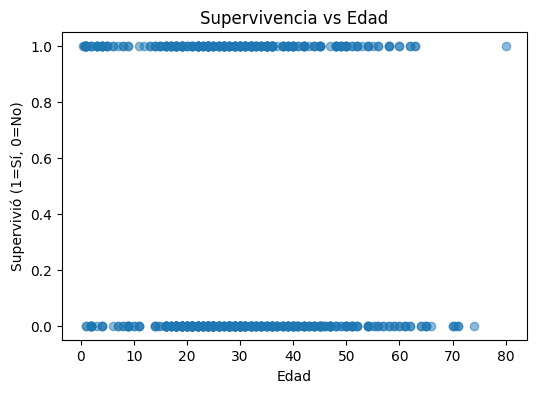

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Survived'], alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Supervivió (1=Sí, 0=No)')
plt.title('Supervivencia vs Edad')
plt.show()

En el gráfico se ve que la edad no es el factor definitivo, pero hay cosas que llaman la atención: casi todos los niños menores de 10 años sobreviven, los pasajeros de entre 15 y 40 años están repartidos entre vivos y muertos sin un patrón claro, y a partir de los 50 la mayoría no lo logra. En resumen, los más pequeños tenían muchas más probabilidades de salvarse, mientras que conforme subía la edad las chances de salir con vida bajaban bastante.S

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch']
family_dist = df['FamilySize'].value_counts().sort_index()

print("Distribución tamaño de familia (SibSp+Parch):\n", family_dist)
print("Viajan solos:", (df['FamilySize']==0).sum())
print("Viajan con familia:", (df['FamilySize']>0).sum())

Distribución tamaño de familia (SibSp+Parch):
 FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64
Viajan solos: 537
Viajan con familia: 354


Se ve con claridad que más de la mitad de los pasajeros viajaba completamente solo (537 de 891), y casi todos los demás iban en grupos muy reducidos: 161 con un solo familiar y 102 con dos acompañantes. A partir de tres miembros el número cae en picado (29 familias de 3, 15 de 4) y ya son prácticamente anecdóticos los grupos grandes (solo 7 con diez personas). En otras palabras, la gran mayoría iba sola o con como máximo un pariente, lo que pudo haberles dado cierta ventaja o desventaja a la hora de buscar espacio en los botes, según el caos del momento.

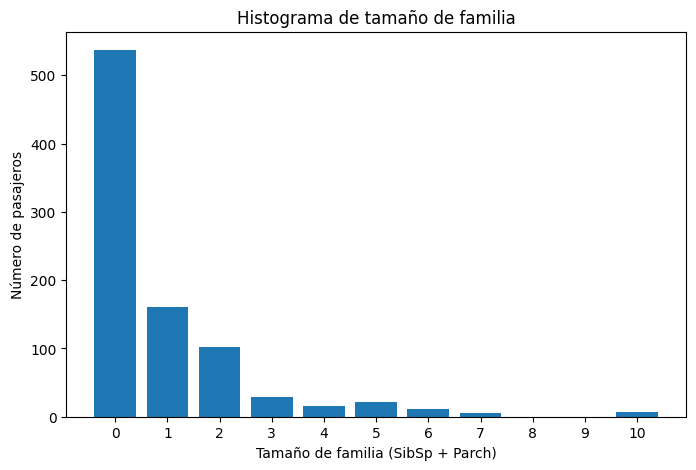

In [21]:
plt.figure(figsize=(8,5))
plt.hist(
    df['FamilySize'],
    bins=range(df['FamilySize'].max() + 2),
    align='left',
    rwidth=0.8
)
plt.xlabel('Tamaño de familia (SibSp + Parch)')
plt.ylabel('Número de pasajeros')
plt.title('Histograma de tamaño de familia')
plt.xticks(range(df['FamilySize'].max() + 1))
plt.show()

In [13]:
large_fam_classes = df[df['FamilySize']>3]['Pclass'].value_counts()
print("Clase con más familias numerosas:", large_fam_classes.idxmax())

female_alone = df[(df['Sex']=='female') & (df['FamilySize']==0)]
prop_female_alone = female_alone.groupby('Pclass').size() / df[df['Sex']=='female'].groupby('Pclass').size()
print("Proporción pasajeras solas por clase:\n", prop_female_alone)
print("Clase con menor proporción de pasajeras solas:", prop_female_alone.idxmin())

Clase con más familias numerosas: 3
Proporción pasajeras solas por clase:
 Pclass
1    0.361702
2    0.421053
3    0.416667
dtype: float64
Clase con menor proporción de pasajeras solas: 1


Se ve que los grupos más grandes (familias de más de 3 personas) estaban sobre todo en tercera clase, mientras que en primera clase es donde menos mujeres viajaban solas (solo un 36 % frente al≈42 % de segunda y tercera). En otras palabras, los pasajeros con familias numerosas se concentraban en la clase más barata y, al mismo tiempo, las mujeres de mayor categoría tendían a viajar en compañía con más frecuencia.

In [14]:
ticket_group = df.groupby('Ticket').agg(
    total_fare = ('Fare','sum'),
    count      = ('PassengerId','count')
)
ticket_group['fare_per_person'] = ticket_group['total_fare'] / ticket_group['count']

print("Tarifa media por persona (primeros 10 tickets):\n",
      ticket_group['fare_per_person'].head(10))

Tarifa media por persona (primeros 10 tickets):
 Ticket
110152    86.5000
110413    79.6500
110465    52.0000
110564    26.5500
110813    75.2500
111240    33.5000
111320    38.5000
111361    57.9792
111369    30.0000
111426    26.5500
Name: fare_per_person, dtype: float64


Con este paso se calcula, para cada número de billete, cuánto pagó en promedio cada pasajero. Así vemos, por ejemplo, que hay billetes cuyo coste medio por cabeza supera los 80 $ , lo cual suele corresponder a cabinas de primera clase o grupos muy reducidos con tarifa alta; otros tickets quedan en torno a 25–40 $, típicos de segunda y tercera clase. Este ajuste nos ayuda a comparar directamente el precio “real” pagado por cada viajero, independientemente de si viajaba solo o en grupo.

Distribución de tarifa per cápita por clase:
         count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778125  0.0   7.75000   8.0500  15.5   69.5500


<Figure size 600x400 with 0 Axes>

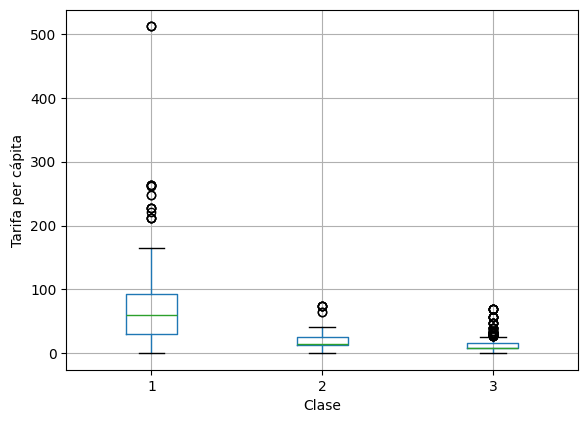

In [16]:
df = df.merge(ticket_group['fare_per_person'], on='Ticket')

fare_stats = df.groupby('Pclass')['fare_per_person'].describe()
print("Distribución de tarifa per cápita por clase:\n", fare_stats)

plt.figure(figsize=(6,4))
df.boxplot(column='fare_per_person', by='Pclass')
plt.suptitle('')
plt.xlabel('Clase')
plt.ylabel('Tarifa per cápita')
plt.title('')
plt.show()

En el boxplot se nota que la primera clase tiene una tarifa per cápita muy superior al resto: la mediana ronda los 60 $, con un rango intercuartílico de aproximadamente 31 $ a 93 $, e incluso algunos pasajeros llegan a pagar más de 500 $ (outliers de cabinas de lujo o grupos pequeños). La segunda clase está mucho más contenida: mediana en 14 $, IQR entre 13 $ y 26 $, y máximos cerca de 73 $. Finalmente, la tercera clase muestra la tarifa más baja, con mediana en 8 $, IQR 7,75 $–15,5 $ y casi ningún valor superior a 70 $. En conjunto, queda claro que el precio que pagaba cada pasajero se agrupa en tres “bandas” bien diferenciadas según la clase de billete.
